#### MSDS 422 - Module 5 Assignment 2
# Yue Yu
github: https://github.com/yy383124955/msds422/tree/main/Week%205
## Data overview


In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set()

In [2]:
# Import data
company = pd.read_csv('data.csv')
# show head of company data
company.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
# check info of company data
company.info()
# check Summary statistics of company data
company.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


## Missing Data

In [4]:
# Find Missing Data
df_missing_data = company.isnull().sum().sort_values(ascending=False)
df_missing_data.head(5)

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 Total expense/Assets                                       0
 Total income/Total expense                                 0
 Retained Earnings to Total Assets                          0
dtype: int64

## Find high absolute value correction features

In [5]:
features = company[:96]
features_corr = features.corr()
features_corr

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,1.000000,-0.586131,-0.542946,-0.574854,-0.381933,-0.381751,-0.598410,-0.618043,-0.616624,-0.431804,...,-0.586035,0.008293,-0.475761,-0.381926,0.153628,0.035985,0.185077,0.045978,NaN,-0.372431
ROA(C) before interest and depreciation before interest,-0.586131,1.000000,0.972051,0.994213,0.271856,0.271545,0.641330,0.665606,0.657750,0.466829,...,0.970770,-0.086671,0.172768,0.271860,-0.692545,0.554939,-0.029753,0.036538,NaN,0.366821
ROA(A) before interest and % after tax,-0.542946,0.972051,1.000000,0.978556,0.249979,0.249713,0.576747,0.662552,0.666265,0.498696,...,0.994587,0.014703,0.141653,0.249987,-0.738915,0.612607,0.009246,0.034990,NaN,0.332761
ROA(B) before interest and depreciation after tax,-0.574854,0.994213,0.978556,1.000000,0.239340,0.239073,0.592470,0.650197,0.651257,0.474785,...,0.975340,-0.072475,0.158885,0.239345,-0.731962,0.593187,-0.018156,0.027444,NaN,0.352450
Operating Gross Margin,-0.381933,0.271856,0.249979,0.239340,1.000000,0.999979,0.682511,0.311505,0.275855,0.007595,...,0.275842,0.017990,0.232043,1.000000,-0.019501,-0.027120,0.062761,-0.090089,NaN,0.084200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liability to Equity,0.035985,0.554939,0.612607,0.593187,-0.027120,-0.026996,0.068607,0.047282,0.064029,0.020544,...,0.543890,0.064050,-0.218316,-0.027100,-0.924264,1.000000,0.079632,-0.013689,NaN,-0.181441
Degree of Financial Leverage (DFL),0.185077,-0.029753,0.009246,-0.018156,0.062761,0.062839,-0.050327,-0.010822,-0.005237,0.014470,...,0.000426,0.013773,0.011193,0.062773,-0.013517,0.079632,1.000000,0.037302,NaN,-0.129376
Interest Coverage Ratio (Interest expense to EBIT),0.045978,0.036538,0.034990,0.027444,-0.090089,-0.091142,-0.050138,0.085665,0.081086,0.133174,...,0.038262,0.021624,0.024792,-0.090119,0.015761,-0.013689,0.037302,1.000000,NaN,0.069276
Net Income Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Save to CSV and to find the 
pd.DataFrame(features_corr).to_csv('features-corr.csv')  

In [7]:
# Keep the features with the absoulute value what is higher than 0.3
company = company.drop(company.columns[[11, 14, 21,24,25,26,27,28,29,31,35,39,40,41,44,45,46,47,48,49,50,51,53,55,56,57,59,62,63,64,65,66,67,70,71,72,73,74,75,76,77,78,79,80,81,85,87,90,91,92,93,94]], axis=1)
# show head of the updated company data
company.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Operating Funds to Liability,Retained Earnings to Total Assets,Total income/Total expense,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Net Income to Total Assets,No-credit Interval,Gross Profit to Sales,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.334015,0.903225,0.002022,0.520382,0.312905,0.118250,0.716845,0.622879,0.601453,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.341106,0.931065,0.002226,0.567101,0.314163,0.047775,0.795297,0.623652,0.610237,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.336731,0.909903,0.002060,0.538491,0.314515,0.025346,0.774670,0.623841,0.601449,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.348716,0.906902,0.001831,0.604105,0.302382,0.067250,0.739555,0.622929,0.583538,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.344639,0.913850,0.002224,0.578469,0.311567,0.047725,0.795016,0.623521,0.598782,0.035490


In [8]:
# Create an X-array and assign it to a variable named x
X = company.loc[:, company.columns != 'Bankrupt?']
# Create an Y-array and assign it to a variable named y
y = company['Bankrupt?']
# Split the data and do a predictive test, 80% training, 20% validation
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

## Random Forest

### Default (n_estimators = 500, max_leaf_nodes=16)

In [9]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1) 
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [10]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[1316,    5],
       [  36,    7]], dtype=int64)

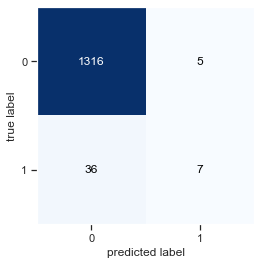

In [11]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [12]:
# Calculate F1 for test data
rf_f1 = f1_score(y_test, y_pred_rf)
rf_f1

0.2545454545454546

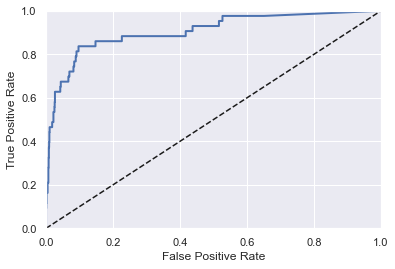

In [13]:
#ROC Plot
y_scores = rnd_clf.predict_proba(X_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_scores[:, 1])
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr_rf, tpr_rf)
plt.show()

In [14]:
#ROC AUC
rf_roc = roc_auc_score(y_test, y_scores[:, 1])
rf_roc

0.906228544267028

### N Estimators (n_estimators = 5, max_leaf_nodes=16)

In [15]:
rnd_clf = RandomForestClassifier(n_estimators=5, max_leaf_nodes=16, n_jobs=-1) 
rnd_clf.fit(X_train, y_train)
y_pred_rf_2 = rnd_clf.predict(X_test)

In [16]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf_2)
cm

array([[1314,    7],
       [  37,    6]], dtype=int64)

In [17]:
# Calculate F1 for test data
rf_f1_2 = f1_score(y_test, y_pred_rf_2)
rf_f1_2

0.21428571428571427

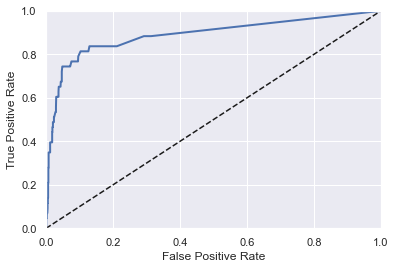

In [18]:
#ROC Plot
y_scores = rnd_clf.predict_proba(X_test)
fpr_rf_2, tpr_rf_2, thresholds_rf_2 = roc_curve(y_test, y_scores[:, 1])
plot_roc_curve(fpr_rf_2, tpr_rf_2)
plt.show()

In [19]:
#ROC AUC
rf_roc_2 = roc_auc_score(y_test, y_scores[:, 1])
rf_roc_2

0.8892664119852824

### Max Leaf Nodes (n_estimators = 5, max_leaf_nodes=16)

In [20]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=64, n_jobs=-1) 
rnd_clf.fit(X_train, y_train)
y_pred_rf_3 = rnd_clf.predict(X_test)

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf_3)
cm

array([[1314,    7],
       [  36,    7]], dtype=int64)

In [22]:
# Calculate F1 for test data
rf_f1_3 = f1_score(y_test, y_pred_rf_3)
rf_f1_3
# Best F1

0.24561403508771928

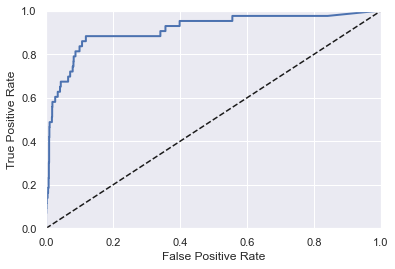

In [23]:
#ROC Plot
y_scores = rnd_clf.predict_proba(X_test)
fpr_rf_3, tpr_rf_3, thresholds_rf_3 = roc_curve(y_test, y_scores[:, 1])
plot_roc_curve(fpr_rf_3, tpr_rf_3)
plt.show()

In [24]:
#ROC AUC
rf_roc_3 = roc_auc_score(y_test, y_scores[:, 1])
rf_roc_3
# Best ROC AUC

0.913578508177385

### Comparison 

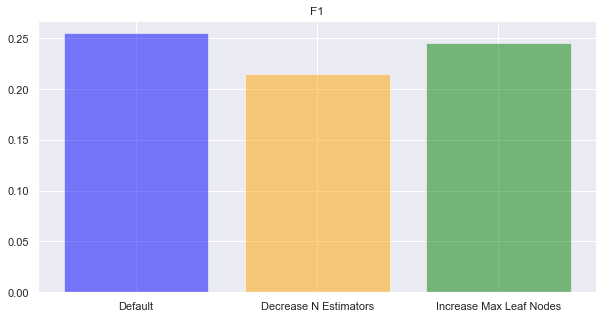

In [25]:
fig = plt.figure(figsize=(10,5))
objects = ('Default', 'Decrease N Estimators', 'Increase Max Leaf Nodes')
y_pos = np.arange(len(objects))
performance = [rf_f1,rf_f1_2,rf_f1_3]

plt.bar(y_pos, performance, color=['blue', 'orange', 'green'], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('F1')

plt.show()

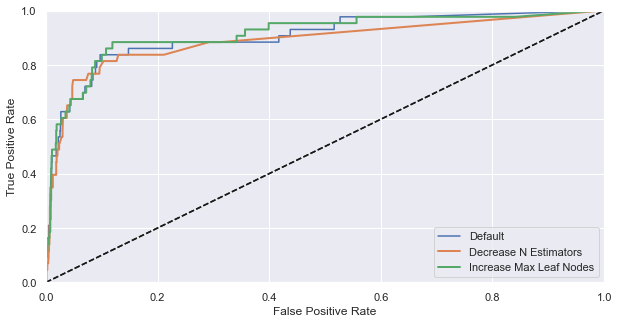

In [26]:
fig = plt.figure(figsize=(10,5))
plt.plot(fpr_rf, tpr_rf, label="Default")
plot_roc_curve(fpr_rf_2, tpr_rf_2, "Decrease N Estimators")
plot_roc_curve(fpr_rf_3, tpr_rf_3, "Increase Max Leaf Nodes")
plt.legend()
plt.show()

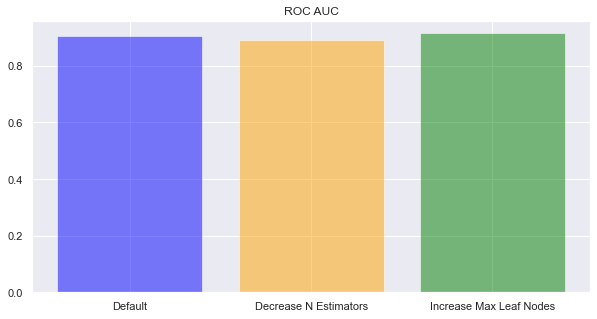

In [27]:
fig = plt.figure(figsize=(10,5))
objects = ('Default', 'Decrease N Estimators', 'Increase Max Leaf Nodes')
y_pos = np.arange(len(objects))
performance = [rf_roc,rf_roc_2,rf_roc_3]

plt.bar(y_pos, performance, color=['blue', 'orange', 'green'], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('ROC AUC')

plt.show()

In Random Forest Classifier, increasing N Estimator and Max Leaf Nodes will help improve the scores of F1 and ROC AUC.However, such growth becomes very limited when it exceeds a certain amount. I found that when N Estimator is greater than 100 and Max Leaf Nodes is about 64, the score does not change significantly

## Gradient Boosted Trees

### Default (max_depth=2，n_estimators=3, learning_rate=1.0)

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0) 
gbrt.fit(X_train, y_train)
y_pred_gbrt = gbrt.predict(X_test)
y_pred_gbrt = y_pred_gbrt.astype('int64')

In [29]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gbrt)
cm

array([[1321,    0],
       [  43,    0]], dtype=int64)

In [30]:
# Calculate F1 for test data
gbrt_f1 = f1_score(y_test, y_pred_gbrt)
gbrt_f1

0.0

In [31]:
#ROC AUC
gbrt_roc = roc_auc_score(y_test, y_pred_gbrt)
gbrt_roc

0.5

### Max Depth (max_depth=4，n_estimators=3, learning_rate=1.0)

In [32]:
gbrt = GradientBoostingRegressor(max_depth=4, n_estimators=3, learning_rate=1.0) 
gbrt.fit(X_train, y_train)
y_pred_gbrt_2 = gbrt.predict(X_test)
y_pred_gbrt_2 = y_pred_gbrt_2.astype('int64')

In [33]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gbrt_2)
cm

array([[1321,    0],
       [  38,    5]], dtype=int64)

In [34]:
# Calculate F1 for test data
gbrt_f1_2 = f1_score(y_test, y_pred_gbrt_2)
gbrt_f1_2

0.20833333333333334

In [35]:
#ROC AUC
gbrt_roc_2 = roc_auc_score(y_test, y_pred_gbrt_2)
gbrt_roc_2

0.5581395348837209

### N estimators (max_depth=2，n_estimators=30, learning_rate=1.0)

In [36]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=30, learning_rate=1.0) 
gbrt.fit(X_train, y_train)
y_pred_gbrt_3 = gbrt.predict(X_test)
y_pred_gbrt_3 = y_pred_gbrt_3.astype('int64')

In [37]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gbrt_3)
cm

array([[1316,    5],
       [  38,    5]], dtype=int64)

In [38]:
# Calculate F1 for test data
gbrt_f1_3 = f1_score(y_test, y_pred_gbrt_3)
gbrt_f1_3

0.18867924528301888

In [39]:
#ROC AUC
gbrt_roc_3 = roc_auc_score(y_test, y_pred_gbrt_3)
gbrt_roc_3

0.556247029206204

### Learning Rate (max_depth=2，n_estimators=3, learning_rate=2)

In [40]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=2) 
gbrt.fit(X_train, y_train)
y_pred_gbrt_4 = gbrt.predict(X_test)
y_pred_gbrt_4 = y_pred_gbrt_4.astype('int64')

In [41]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gbrt_4)
cm

array([[1316,    5],
       [  38,    5]], dtype=int64)

In [42]:
# Calculate F1 for test data
gbrt_f1_4 = f1_score(y_test, y_pred_gbrt_4)
gbrt_f1_4

0.18867924528301888

In [43]:
#ROC AUC
gbrt_roc_4 = roc_auc_score(y_test, y_pred_gbrt_4)
gbrt_roc_4

0.556247029206204

### Comparison 

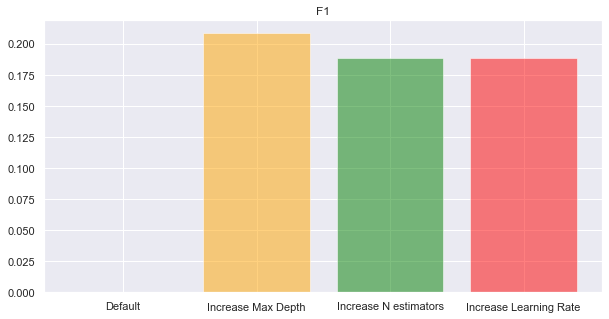

In [44]:
fig = plt.figure(figsize=(10,5))
objects = ('Default', 'Increase Max Depth', 'Increase N estimators','Increase Learning Rate')
y_pos = np.arange(len(objects))
performance = [gbrt_f1,gbrt_f1_2,gbrt_f1_3, gbrt_f1_4]

plt.bar(y_pos, performance, color=['blue', 'orange', 'green', 'red'], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('F1')

plt.show()

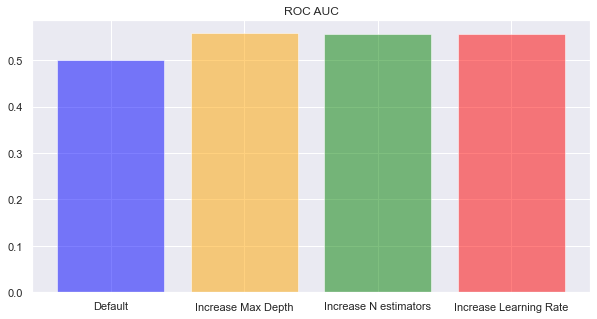

In [45]:
fig = plt.figure(figsize=(10,5))
objects = ('Default', 'Increase Max Depth', 'Increase N estimators','Increase Learning Rate')
y_pos = np.arange(len(objects))
performance = [gbrt_roc,gbrt_roc_2,gbrt_roc_3, gbrt_roc_4]

plt.bar(y_pos, performance, color=['blue', 'orange', 'green', 'red'], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('ROC AUC')

plt.show()

## Extra Trees 

### Defaut (n_estimators = 500,  max_features = 2)

In [46]:
from sklearn.ensemble import ExtraTreesClassifier

In [47]:
et = ExtraTreesClassifier(n_estimators = 500, criterion ='entropy', max_features = 2)
et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)

In [48]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_et)
cm

array([[1318,    3],
       [  38,    5]], dtype=int64)

In [49]:
# Calculate F1 for test data
et_f1 = f1_score(y_test,y_pred_et)
et_f1

0.19607843137254904

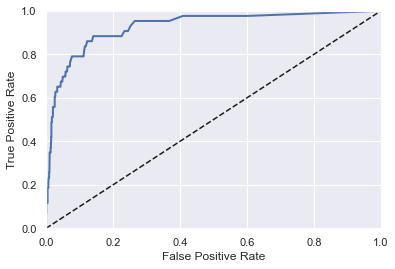

In [50]:
#ROC Plot
y_scores = et.predict_proba(X_test)
fpr_et, tpr_et, thresholds_et = roc_curve(y_test, y_scores[:, 1])
plot_roc_curve(fpr_et, tpr_et)
plt.show()

In [51]:
#ROC AUC
et_roc = roc_auc_score(y_test, y_scores[:, 1])
et_roc
#Best ROC AUC

0.9275742478390225

### N estimators (n_estimators = 5,  max_features = 2) 

In [52]:
et = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 2)
et.fit(X_train, y_train)
y_pred_et_2 = et.predict(X_test)

In [53]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_et_2)
cm

array([[1309,   12],
       [  37,    6]], dtype=int64)

In [54]:
# Calculate F1 for test data
et_f1_2 = f1_score(y_test,y_pred_et_2)
et_f1_2

0.19672131147540986

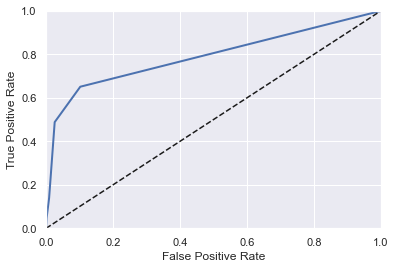

In [55]:
#ROC Plot
y_scores = et.predict_proba(X_test)
fpr_et_2, tpr_et_2, thresholds_et_2 = roc_curve(y_test, y_scores[:, 1])
plot_roc_curve(fpr_et_2, tpr_et_2)
plt.show()

In [56]:
#ROC AUC
et_roc_2 = roc_auc_score(y_test, y_scores[:, 1])
et_roc_2

0.7907416861785469

### Max features (n_estimators = 500, max_features = 43)

In [57]:
et = ExtraTreesClassifier(n_estimators = 500, criterion ='entropy', max_features = 43)
et.fit(X_train, y_train)
y_pred_et_3 = et.predict(X_test)

In [58]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_et_3)
cm

array([[1311,   10],
       [  34,    9]], dtype=int64)

In [59]:
# Calculate F1 for test data
et_f1_3 = f1_score(y_test,y_pred_et_3)
et_f1_3
# Best F1

0.2903225806451613

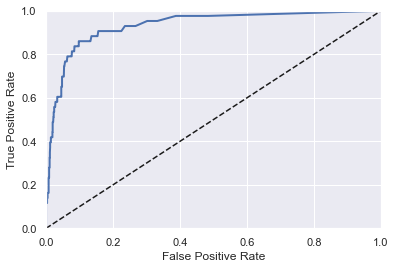

In [60]:
#ROC Plot
y_scores = et.predict_proba(X_test)
fpr_et_3, tpr_et_3, thresholds_et_3 = roc_curve(y_test, y_scores[:, 1])
plot_roc_curve(fpr_et_3, tpr_et_3)
plt.show()

In [61]:
#ROC AUC
et_roc_3 = roc_auc_score(y_test, y_scores[:, 1])
et_roc_3

0.9329612872559547

### N estimators and Max features (n_estimators = 5000, max_features = 43)

In [62]:
et = ExtraTreesClassifier(n_estimators = 500, criterion ='entropy', max_features = 43)
et.fit(X_train, y_train)
y_pred_et_4 = et.predict(X_test)

In [63]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_et_4)
cm

array([[1310,   11],
       [  34,    9]], dtype=int64)

In [64]:
# Calculate F1 for test data
et_f1_4 = f1_score(y_test,y_pred_et_4)
et_f1_4

0.28571428571428575

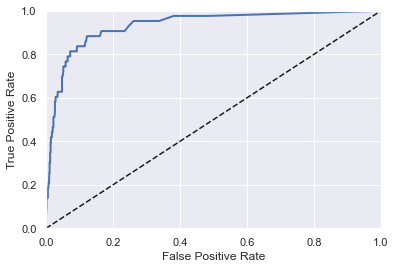

In [65]:
#ROC Plot
y_scores = et.predict_proba(X_test)
fpr_et_4, tpr_et_4, thresholds_et_4 = roc_curve(y_test, y_scores[:, 1])
plot_roc_curve(fpr_et_4, tpr_et_4)
plt.show()

In [66]:
#ROC AUC
et_roc_4 = roc_auc_score(y_test, y_scores[:, 1])
et_roc_4

0.9330845201837932

### Comparison

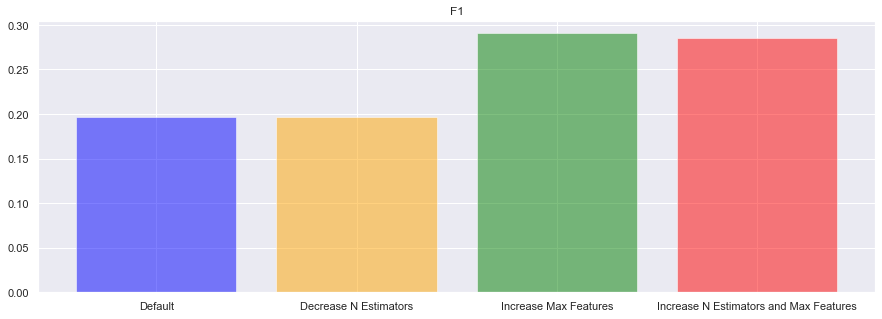

In [67]:
fig = plt.figure(figsize=(15,5))
objects = ('Default', 'Decrease N Estimators', 'Increase Max Features','Increase N Estimators and Max Features')
y_pos = np.arange(len(objects))
performance = [et_f1,et_f1_2,et_f1_3,et_f1_4]

plt.bar(y_pos, performance, color=['blue', 'orange', 'green','red'], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('F1')

plt.show()

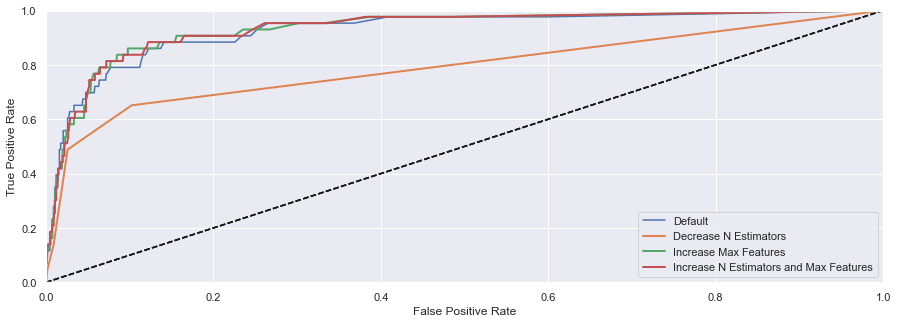

In [68]:
fig = plt.figure(figsize=(15,5))
plt.plot(fpr_et, tpr_et, label="Default")
plot_roc_curve(fpr_et_2, tpr_et_2, "Decrease N Estimators")
plot_roc_curve(fpr_et_3, tpr_et_3, "Increase Max Features")
plot_roc_curve(fpr_et_4, tpr_et_4, "Increase N Estimators and Max Features")
plt.legend()
plt.show()

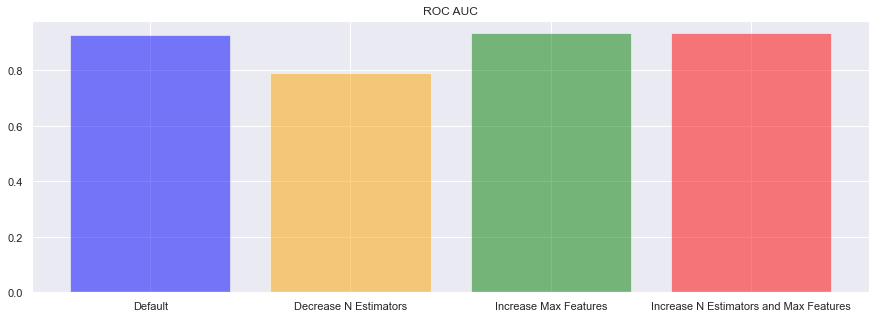

In [69]:
fig = plt.figure(figsize=(15,5))
objects = ('Default', 'Decrease N Estimators', 'Increase Max Features','Increase N Estimators and Max Features')
y_pos = np.arange(len(objects))
performance = [et_roc,et_roc_2,et_roc_3, et_roc_4]

plt.bar(y_pos, performance, color=['blue', 'orange', 'green', 'red'], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('ROC AUC')

plt.show()

## Conclusion
From the models that adjust the values above, select the best performers for comparison.

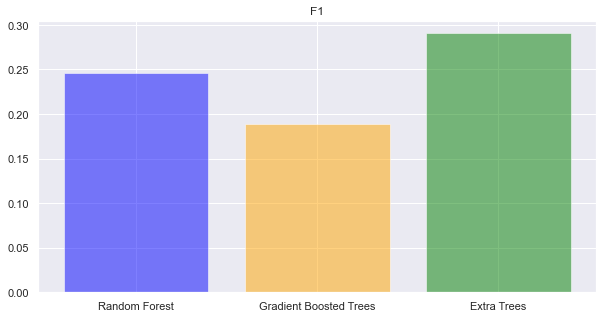

In [70]:
fig = plt.figure(figsize=(10,5))
objects = ('Random Forest', 'Gradient Boosted Trees', 'Extra Trees')
y_pos = np.arange(len(objects))
performance = [rf_f1_3,gbrt_f1_4,et_f1_3]

plt.bar(y_pos, performance, color=['blue', 'orange', 'green'], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('F1')

plt.show()

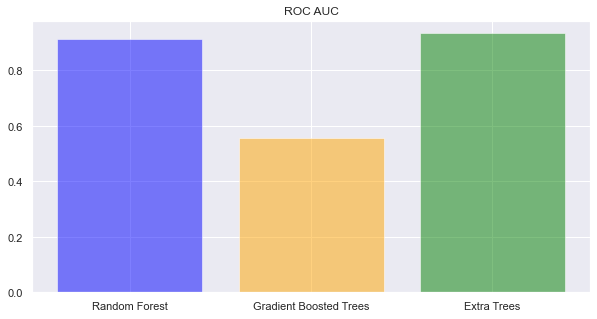

In [72]:
fig = plt.figure(figsize=(10,5))
objects = ('Random Forest', 'Gradient Boosted Trees', 'Extra Trees')
y_pos = np.arange(len(objects))
performance = [rf_roc_3,gbrt_roc_4,et_roc_3]

plt.bar(y_pos, performance, color=['blue', 'orange', 'green', 'red'], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('ROC AUC')

plt.show()

In this analysis project, Random Forest and Extra Trees showed stable F1 and ROC AUC comprehensively, and the score of Extra Trees was the highest.